<a href="https://colab.research.google.com/github/leonardosantosp/IA-raisin/blob/main/raisin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autores:
<br> <b>Leonardo dos Santos Paiva RA: 2022.1.08.012
<p>Pedro Ywao Fujimoto RA: 2022.1.08.042


# Base de dados

A base de dados `Raisin` (https://archive.ics.uci.edu/dataset/850/raisin) é uma coleção de dados utilizada para a classificação de dois tipos diferentes de uvas passas: "Kecimen" e "Besni". Esta base de dados tem como objetivo principal auxiliar na distinção entre esses dois tipos de passas com base em suas características morfológicas, facilitando processos de classificação automática que podem ser utilizados na indústria alimentícia.

<br>

**Descrição do Problema**
A necessidade de classificar automaticamente tipos de passas surge de diversos fatores, como a otimização da qualidade do produto, a automatização de processos de seleção e a melhoria da eficiência operacional na cadeia de produção. As passas, sendo um produto amplamente consumido e cultivado, requerem métodos precisos e eficientes para garantir que diferentes variedades sejam corretamente identificadas e processadas.

<br>

**Características da Base de Dados**
A base de dados contém informações sobre várias propriedades morfológicas das passas, que foram extraídas a partir de imagens digitais utilizando técnicas de processamento de imagem. As principais características incluídas na base de dados são:

<br>

**Área:** A área da passa em pixels quadrados.<br>

**Perímetro:** O perímetro da passa em pixels.<br>

**Comprimento do eixo principal:** O comprimento do maior eixo da elipse que se ajusta à passa.<br>

**Comprimento do eixo menor:** O comprimento do menor eixo da elipse que se ajusta à passa.<br>

**Excentricidade:** A excentricidade da elipse ajustada.<br>

**Raio de Eqüidistância:** A média dos comprimentos dos segmentos de linha entre o centroide e a borda da passa.<br>

Cada registro na base de dados é rotulado como uma das duas classes possíveis: "Kecimen" ou "Besni", indicando o tipo da passa.

<br>



# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import warnings
import random

from more_itertools import flatten
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors



# Lendo a base de dados


In [4]:
import pandas as pd

# Lendo o arquivo .xlsx
file_name = 'Raisin_Dataset.xlsx'
dataset = pd.read_excel(file_name)

# Nomeando as colunas
column_names = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Class']
dataset.columns = column_names


# Trocando o target de Kecimen, Besni para 1, 0 respectivamente
dataset['Class'] = dataset['Class'].map({'Kecimen': 1, 'Besni': 0})

target_column = ['Class']

# Normalizando as variáveis preditoras
predictors = list(set(list(dataset.columns)) - set(target_column))
dataset[predictors] = dataset[predictors] / dataset[predictors].max()

# Separando as features e a target
X = dataset.drop('Class', axis=1)
y = dataset['Class']

print("\nEstatística descritiva das variáveis normalizadas:")
dataset[predictors].describe().transpose()


Estatística descritiva das variáveis normalizadas:


,count,mean,std,min,25%,50%,75%,max
Eccentricity,900.0,0.812309,0.093874,0.362458,0.770967,0.830294,0.875740,1.0
Area,900.0,0.373560,0.165933,0.108008,0.252494,0.335686,0.446839,1.0
Extent,900.0,0.837278,0.063999,0.454670,0.802999,0.846685,0.879750,1.0
MajorAxisLength,900.0,0.432100,0.116350,0.226242,0.346381,0.408911,0.495529,1.0
Perimeter,900.0,0.432177,0.101479,0.229478,0.358228,0.414978,0.484992,1.0
ConvexArea,900.0,0.327752,0.146538,0.093952,0.221098,0.293480,0.389537,1.0
MinorAxisLength,900.0,0.516963,0.101547,0.291932,0.445099,0.503475,0.568561,1.0


In [5]:
#--------------------------------------------------
#Criando os conjuntos de dados de treinamento e teste
#--------------------------------------------------
#As primeiras linhas de código abaixo criam arrays das variáveis ​​independentes
# entrada_X e dependentes (saidaDesejada_y), respectivamente.
#--------------------------------------------------
#A terceira linha divide os dados em conjunto de dados de treinamento e teste,
#A quarta linha imprime a forma dos dados de treinamento e teste.
entrada_X = dataset[predictors].values
saidaDesejada_y = dataset[target_column].values
# Aplicando a funcao train_test_split para dividir o conjunto original em 70% para treindo e 30% para teste.
X_train, X_test, y_train, y_test = train_test_split(entrada_X, saidaDesejada_y, test_size=0.3, random_state=42)
#--------------------------------------------------
print("Conjunto de treinamento:")
print(X_train.shape);
print("Conjunto de teste:")
print(X_test.shape)

# Aplicando a funcao train_test_split para dividir o conjunto de treinamento em 50% cada.
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

print("Conjunto de treinamento 1:")
print(X_train1.shape);
print("Conjunto de treinamento 2:")
print(X_train2.shape);

# Convertendo y_train1 e y_test para arrays unidimensionais
y_train1 = y_train1.ravel()
y_test = y_test.ravel()

Conjunto de treinamento:
(630, 7)
Conjunto de teste:
(270, 7)
Conjunto de treinamento 1:
(315, 7)
Conjunto de treinamento 2:
(315, 7)


#**Treinamento**


Função genérica para o treinamento



In [19]:
def train_and_evaluate_model(model_func, X_train, y_train, X_test, y_test, index, area_test, area_model):
    list_accuracy_train = [0] * area_model
    list_recall_train = [0] * area_model
    list_precision_train = [0] * area_model
    list_f1_train = [0] * area_model

    list_accuracy_test = [0] * area_model
    list_recall_test = [0] * area_model
    list_precision_test = [0] * area_model
    list_f1_test = [0] * area_model

    list_sum_total = [0] * area_model

    for i in range(area_model):
        model_instance = model_func(i)

        accuracy_train_sum = 0
        recall_train_sum = 0
        precision_train_sum = 0
        f1_train_sum = 0

        accuracy_test_sum = 0
        recall_test_sum = 0
        precision_test_sum = 0
        f1_test_sum = 0

        for j in range(area_test):
            model_instance.fit(X_train, y_train)
            y_pred_train = model_instance.predict(X_train)
            y_pred_test = model_instance.predict(X_test)

            accuracy_train_sum += accuracy_score(y_train, y_pred_train)
            recall_train_sum += recall_score(y_train, y_pred_train, average='macro')
            precision_train_sum += precision_score(y_train, y_pred_train, average='macro')
            f1_train_sum += f1_score(y_train, y_pred_train, average='macro')

            accuracy_test_sum += accuracy_score(y_test, y_pred_test)
            recall_test_sum += recall_score(y_test, y_pred_test, average='macro')
            precision_test_sum += precision_score(y_test, y_pred_test, average='macro')
            f1_test_sum += f1_score(y_test, y_pred_test, average='macro')

        list_accuracy_train[i] = accuracy_train_sum / area_test
        list_recall_train[i] = recall_train_sum / area_test
        list_precision_train[i] = precision_train_sum / area_test
        list_f1_train[i] = f1_train_sum / area_test

        list_accuracy_test[i] = accuracy_test_sum / area_test
        list_recall_test[i] = recall_test_sum / area_test
        list_precision_test[i] = precision_test_sum / area_test
        list_f1_test[i] = f1_test_sum / area_test

        list_sum_total[i] = (list_accuracy_test[i] + list_recall_test[i] + list_precision_test[i] + list_f1_test[i]) / 4

    for i in range(area_model):
        print('Modelo', i)
        print('Acurácia: ', list_accuracy_test[i])
        print('Recall: ', list_recall_test[i])
        print('Precision: ', list_precision_test[i])
        print('f1 Score: ', list_f1_test[i])
        print('-------------------------------------------------')

    print('-------------Conjunto de Treino -----------------')
    print('Acurácia: ', statistics.mean(list_accuracy_train))
    print('Recall: ', statistics.mean(list_recall_train))
    print('Precision: ', statistics.mean(list_precision_train))
    print('f1 Score: ', statistics.mean(list_f1_train))
    print('-------------------------------------------------')

    print('-------------Conjunto de Teste ------------------')
    print('Acurácia: ', statistics.mean(list_accuracy_test))
    print('Recall: ', statistics.mean(list_recall_test))
    print('Precision: ', statistics.mean(list_precision_test))
    print('f1 Score: ', statistics.mean(list_f1_test))
    print('-------------------------------------------------')

    filtered_list_sum_total = [x for x in list_sum_total if x not in (None, 0)]

    list_max_and_min[index] = max(filtered_list_sum_total)

    if area_model == 1:
        return {
            'list_max_and_min': max(filtered_list_sum_total),
            'list_sum_total': list_sum_total,
            'list_accuracy_test': list_accuracy_test,
            'list_recall_test': list_recall_test,
            'list_precision_test': list_precision_test,
            'list_f1_test': list_f1_test,
            'list_accuracy_train': list_accuracy_train,
            'list_recall_train': list_recall_train,
            'list_precision_train': list_precision_train,
            'list_f1_train': list_f1_train
        }
    else:
        return {
            'maximo': max(filtered_list_sum_total),
            'minimo': min(filtered_list_sum_total),
            'list_max_and_min': [max(filtered_list_sum_total), min(filtered_list_sum_total)],
            'list_sum_total': list_sum_total,
            'list_accuracy_test': list_accuracy_test,
            'list_recall_test': list_recall_test,
            'list_precision_test': list_precision_test,
            'list_f1_test': list_f1_test,
            'list_accuracy_train': list_accuracy_train,
            'list_recall_train': list_recall_train,
            'list_precision_train': list_precision_train,
            'list_f1_train': list_f1_train
        }

#KNN

In [59]:
# Definindo a função para criar instâncias de modelos
def knn_model(i):
    lista_intervalo = list(range(10, 60))
    weights_options = ['uniform', 'distance']
    algorithm_options = ['auto', 'ball_tree', 'kd_tree', 'brute']
    # Embaralhando com seed fixa para garantir determinismo
    random.seed(i)
    random.shuffle(lista_intervalo)

    return KNeighborsClassifier(
        n_neighbors=lista_intervalo[i % len(lista_intervalo)],
        weights=random.choice(weights_options),
        algorithm=random.choice(algorithm_options)
    )

Realizando o treinamento para as bases de treino 1 e 2

In [60]:
#inicializando as variáveis modelo 1

accuracy_knn_train1 = [0] * 15
recall_knn_train1 = [0] * 15
precision_knn_train1 = [0] * 15
f1_knn_train1 = [0] * 15

accuracy_knn_test1 = [0] * 15
recall_knn_test1 = [0] * 15
precision_knn_test1 = [0] * 15
f1_knn_test1 = [0] * 15

#inicializando as variáveis modelo 2

accuracy_knn_train2 = [0] * 15
recall_knn_train2 = [0] * 15
precision_knn_train2 = [0] * 15
f1_knn_train2 = [0] * 15

accuracy_knn_test2 = [0] * 15
recall_knn_test2 = [0] * 15
precision_knn_test2 = [0] * 15
f1_knn_test2 = [0] * 15

# Inicializando variáveis
list_max_and_min = [0] * 10

list_sum_total_knn1 = [0] * 15
list_sum_total_knn2 = [0] * 15

results_knn1 = train_and_evaluate_model(knn_model, X_train1, y_train1, X_test, y_test, 0, 1, 1)
results_knn2 = train_and_evaluate_model(knn_model, X_train2, y_train2, X_test, y_test, 1, 1, 1)

# Atualizando variáveis globais com os resultados de KNN
list_sum_total_knn1 = results_knn1['list_sum_total']
list_sum_total_knn2 = results_knn2['list_sum_total']

accuracy_knn_test1 = results_knn1['list_accuracy_test']
recall_knn_test1 = results_knn1['list_recall_test']
precision_knn_test1 = results_knn1['list_precision_test']
f1_knn_test1 = results_knn1['list_f1_test']

accuracy_knn_train1 = results_knn1['list_accuracy_train']
recall_knn_train1 = results_knn1['list_recall_train']
precision_knn_train1 = results_knn1['list_precision_train']
f1_knn_train1 = results_knn1['list_f1_train']

accuracy_knn_test2 = results_knn2['list_accuracy_test']
recall_knn_test2 = results_knn2['list_recall_test']
precision_knn_test2 = results_knn2['list_precision_test']
f1_knn_test2 = results_knn2['list_f1_test']

accuracy_knn_train2 = results_knn2['list_accuracy_train']
recall_knn_train2 = results_knn2['list_recall_train']
precision_knn_train2 = results_knn2['list_precision_train']
f1_knn_train2 = results_knn2['list_f1_train']


Modelo 0
Acurácia:  0.8407407407407408
Recall:  0.838281378855352
Precision:  0.844435736677116
f1 Score:  0.8393635420269803
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.8698412698412699
Recall:  0.8682947487295314
Precision:  0.8772411798727588
f1 Score:  0.8688046647230321
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.8407407407407408
Recall:  0.838281378855352
Precision:  0.844435736677116
f1 Score:  0.8393635420269803
-------------------------------------------------
Modelo 0
Acurácia:  0.8629629629629629
Recall:  0.8621969322117764
Precision:  0.8630952380952381
f1 Score:  0.8625386996904025
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.8571428571428571
Recall:  0.86181016345687
Precision:  0.865
f1 Score:  0.8570506549954116
-------------------------------------------------
------

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


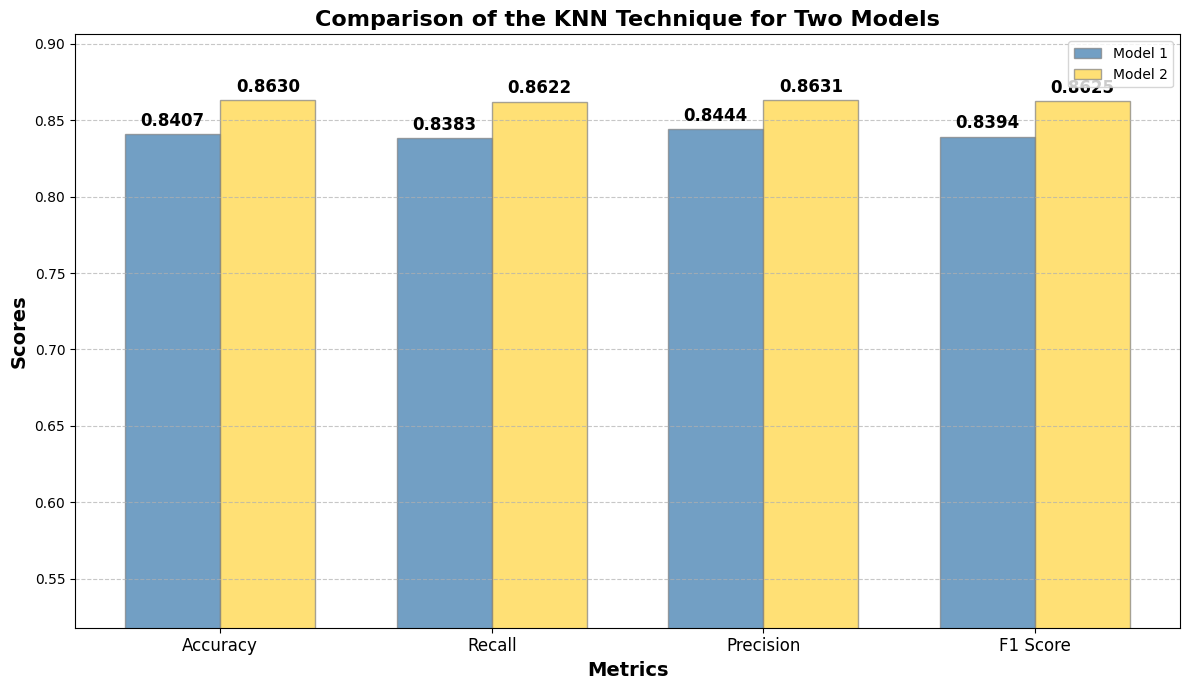

In [61]:

# Valores das métricas para cada série de dados
values1 = [np.mean(accuracy_knn_test1), np.mean(recall_knn_test1), np.mean(precision_knn_test1), np.mean(f1_knn_test1)]
values2 = [np.mean(accuracy_knn_test2), np.mean(recall_knn_test2), np.mean(precision_knn_test2), np.mean(f1_knn_test2)]

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Nomes das métricas para o eixo x
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], metrics, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of the KNN Technique for Two Models', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


# Floresta Aleatória


In [62]:
def rf_model(i):
    lista_intervalo = list(range(10, 100))
    criterion_options = ['gini', 'entropy']
    max_features_options = ['auto', 'sqrt', 'log2']
    random.shuffle(lista_intervalo)
    return RandomForestClassifier(
        n_estimators=lista_intervalo[i],
        criterion=random.choice(criterion_options),
        max_features=random.choice(max_features_options)
    )

Realizando o treino para a base de dados 1 e 2

In [63]:
#inicializando as variáveis modelo 1

accuracy_rf_train1 = [0] * 15
recall_rf_train1 = [0] * 15
precision_rf_train1 = [0] * 15
f1_rf_train1 = [0] * 15

accuracy_rf_test1 = [0] * 15
recall_rf_test1 = [0] * 15
precision_rf_test1 = [0] * 15
f1_rf_test1 = [0] * 15

#inicializando as variáveis modelo 2

accuracy_rf_train2 = [0] * 15
recall_rf_train2 = [0] * 15
precision_rf_train2 = [0] * 15
f1_rf_train2 = [0] * 15

accuracy_rf_test2 = [0] * 15
recall_rf_test2 = [0] * 15
precision_rf_test2 = [0] * 15
f1_rf_test2 = [0] * 15

# Inicializando variáveis
list_max_and_min = [0] * 10

list_sum_total_rf1 = [0] * 15
list_sum_total_rf2 = [0] * 15

results_rf1 = train_and_evaluate_model(rf_model, X_train1, y_train1, X_test, y_test, 2, 5, 3)
results_rf2 = train_and_evaluate_model(rf_model, X_train2, y_train2, X_test, y_test, 4, 5, 3)

# Atualizando variáveis globais com os resultados
list_sum_total_rf1 = results_rf1['list_sum_total']

list_sum_total_rf2 = results_rf2['list_sum_total']

accuracy_rf_test1 = results_rf1['list_accuracy_test']
recall_rf_test1 = results_rf1['list_recall_test']
precision_rf_test1 = results_rf1['list_precision_test']
f1_rf_test1 = results_rf1['list_f1_test']

accuracy_rf_train1 = results_rf1['list_accuracy_train']
recall_rf_train1 = results_rf1['list_recall_train']
precision_rf_train1 = results_rf1['list_precision_train']
f1_rf_train1 = results_rf1['list_f1_train']

accuracy_rf_test2 = results_rf2['list_accuracy_test']
recall_rf_test2 = results_rf2['list_recall_test']
precision_rf_test2 = results_rf2['list_precision_test']
f1_rf_test2 = results_rf2['list_f1_test']

accuracy_rf_train2 = results_rf2['list_accuracy_train']
recall_rf_train2 = results_rf2['list_recall_train']
precision_rf_train2 = results_rf2['list_precision_train']
f1_rf_train2 = results_rf2['list_f1_train']

Modelo 0
Acurácia:  0.8422222222222222
Recall:  0.8408213755566551
Precision:  0.8432244670942026
f1 Score:  0.8414584663685784
-------------------------------------------------
Modelo 1
Acurácia:  0.8303703703703704
Recall:  0.8290780141843971
Precision:  0.8310165839925959
f1 Score:  0.8296170681751377
-------------------------------------------------
Modelo 2
Acurácia:  0.8303703703703702
Recall:  0.8290780141843971
Precision:  0.8310923020535835
f1 Score:  0.8296039476899825
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.9987301587301587
Recall:  0.9987295313382271
Precision:  0.9987374049641837
f1 Score:  0.9987294501553092
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.834320987654321
Recall:  0.8329924679751498
Precision:  0.8351111177134607
f1 Score:  0.8335598274112328
-------------------------------------------------


<ipython-input-19-bd336dd5ee65>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
<ipython-input-19-bd336dd5ee65>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
<ipython-input-19-bd336dd5ee65>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
<ipython-input-19-bd336dd5ee65>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
<ipython-input-19-bd336dd5ee65>:28: DataConversionWarning: A column-vector y was

Modelo 0
Acurácia:  0.8392592592592593
Recall:  0.8412831931387101
Precision:  0.841919533913164
f1 Score:  0.8392415033667529
-------------------------------------------------
Modelo 1
Acurácia:  0.837037037037037
Recall:  0.8389576117433613
Precision:  0.8393884330019372
f1 Score:  0.8370279317056134
-------------------------------------------------
Modelo 2
Acurácia:  0.837037037037037
Recall:  0.8388256638627741
Precision:  0.8391309853196111
f1 Score:  0.8370185962004302
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.9989417989417989
Recall:  0.9989763715811619
Precision:  0.9989040330367742
f1 Score:  0.998938173339371
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.8377777777777777
Recall:  0.8396888229149485
Precision:  0.8401463174115708
f1 Score:  0.8377626770909321
-------------------------------------------------


<ipython-input-19-bd336dd5ee65>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)


Comparando o resultado para os dois conjuntos de testes

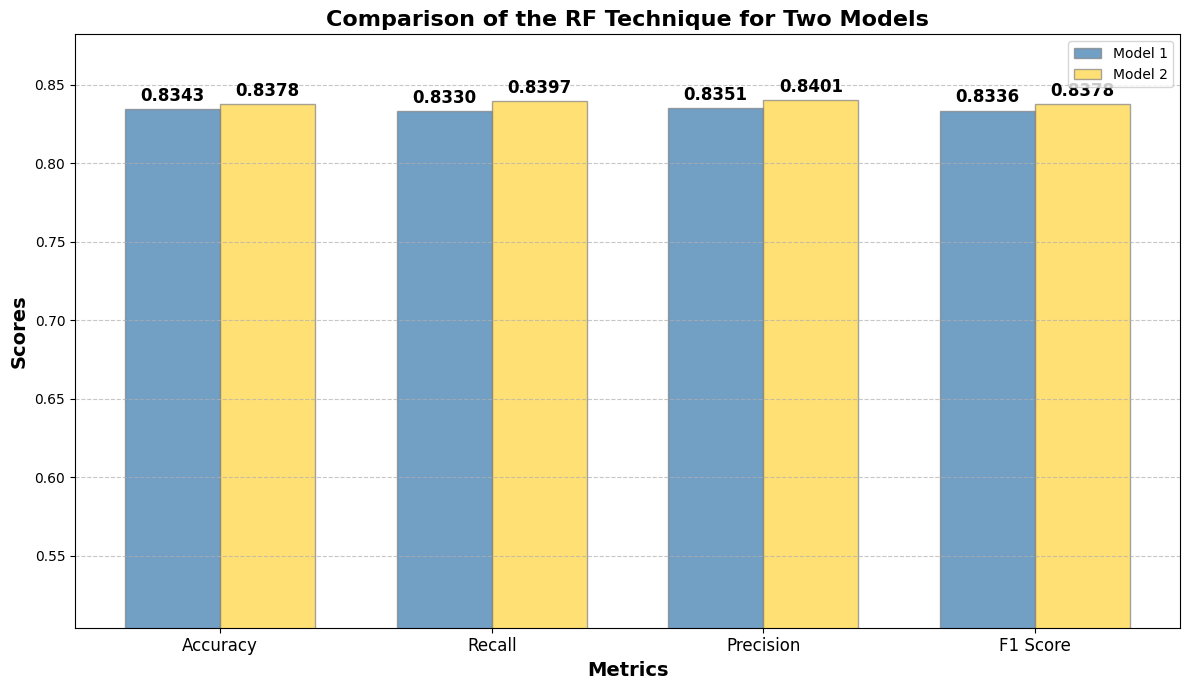

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Valores das métricas para cada série de dados
values1 = [np.mean(accuracy_rf_test1), np.mean(recall_rf_test1), np.mean(precision_rf_test1), np.mean(f1_rf_test1)]
values2 = [np.mean(accuracy_rf_test2), np.mean(recall_rf_test2), np.mean(precision_rf_test2), np.mean(f1_rf_test2)]

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Nomes das métricas para o eixo x
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], metrics, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of the RF Technique for Two Models', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


# MLP

<h1>Redes Neurais Artificiais - RNAs</h1>


Realizando o treinamento pela técnica de `Rede Neural Artificial do tipo MultiLayer Perceptron (RNAs/MLP)`.

In [65]:
def mlp_model(i):
    activation_options = ['tanh', 'relu']
    solver_options = ['sgd', 'adam']
    return MLPClassifier(
        hidden_layer_sizes=((5*i)+30),
        activation=random.choice(activation_options),
        solver=random.choice(solver_options),
        max_iter=((i*30)+180),
        alpha=0.0001,
        learning_rate_init=0.001,
        random_state=None
    )

Realizando o treinamento para a base de dados 1 e 2



In [66]:
#inicializando as variáveis modelo 1

accuracy_mlp_train1 = [0] * 15
recall_mlp_train1 = [0] * 15
precision_mlp_train1 = [0] * 15
f1_mlp_train1 = [0] * 15

accuracy_mlp_test1 = [0] * 15
recall_mlp_test1 = [0] * 15
precision_mlp_test1 = [0] * 15
f1_mlp_test1 = [0] * 15

#inicializando as variáveis modelo 2

accuracy_mlp_train2 = [0] * 15
recall_mlp_train2 = [0] * 15
precision_mlp_train2 = [0] * 15
f1_mlp_train2 = [0] * 15

accuracy_mlp_test2 = [0] * 15
recall_mlp_test2 = [0] * 15
precision_mlp_test2 = [0] * 15
f1_mlp_test2 = [0] * 15

# Inicializando variáveis
list_max_and_min = [0] * 10

list_sum_total_mlp1 = [0] * 15
list_sum_total_mlp2 = [0] * 15

results_mlp1 = train_and_evaluate_model(mlp_model, X_train1, y_train1, X_test, y_test, 6, 5, 3)
results_mlp2 = train_and_evaluate_model(mlp_model, X_train2, y_train2, X_test, y_test, 8, 5, 3)

# Atualizando variáveis globais com os resultados
list_sum_total_mlp1 = results_mlp1['list_sum_total']

list_sum_total_mlp2 = results_mlp2['list_sum_total']

accuracy_mlp_test1 = results_mlp1['list_accuracy_test']
recall_mlp_test1 = results_mlp1['list_recall_test']
precision_mlp_test1 = results_mlp1['list_precision_test']
f1_mlp_test1 = results_mlp1['list_f1_test']

accuracy_mlp_train1 = results_mlp1['list_accuracy_train']
recall_mlp_train1 = results_mlp1['list_recall_train']
precision_mlp_train1 = results_mlp1['list_precision_train']
f1_mlp_train1 = results_mlp1['list_f1_train']

accuracy_mlp_test2 = results_mlp2['list_accuracy_test']
recall_mlp_test2 = results_mlp2['list_recall_test']
precision_mlp_test2 = results_mlp2['list_precision_test']
f1_mlp_test2 = results_mlp2['list_f1_test']

accuracy_mlp_train2 = results_mlp2['list_accuracy_train']
recall_mlp_train2 = results_mlp2['list_recall_train']
precision_mlp_train2 = results_mlp2['list_precision_train']
f1_mlp_train2 = results_mlp2['list_f1_train']


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Modelo 0
Acurácia:  0.8607407407407408
Recall:  0.8609269338611248
Precision:  0.8604274240086734
f1 Score:  0.8605777041717838
-------------------------------------------------
Modelo 1
Acurácia:  0.8533333333333333
Recall:  0.8535048655780967
Precision:  0.8536423279748991
f1 Score:  0.8531104006303293
-------------------------------------------------
Modelo 2
Acurácia:  0.837037037037037
Recall:  0.8373082632360218
Precision:  0.8369601162083278
f1 Score:  0.8368487508676186
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.8393650793650793
Recall:  0.838575192923019
Precision:  0.8415910156791435
f1 Score:  0.838826184591591
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.8503703703703703
Recall:  0.8505800208917478
Precision:  0.8503432893973001
f1 Score:  0.8501789518899106
-------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Modelo 0
Acurácia:  0.8474074074074075
Recall:  0.8484248721754908
Precision:  0.8478500330691545
f1 Score:  0.8473703881475011
-------------------------------------------------
Modelo 1
Acurácia:  0.6474074074074074
Recall:  0.660893946890978
Precision:  0.768369243822067
f1 Score:  0.5977683226294399
-------------------------------------------------
Modelo 2
Acurácia:  0.8496296296296295
Recall:  0.8508164275111332
Precision:  0.8503114295040785
f1 Score:  0.8496095377274411
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.7997883597883598
Recall:  0.7945473917030803
Precision:  0.7994354069923435
f1 Score:  0.7779722727836028
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.7814814814814814
Recall:  0.7867117488592007
Precision:  0.8221769021317666
f1 Score:  0.7649160828347941
-------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
  warnings.warn(


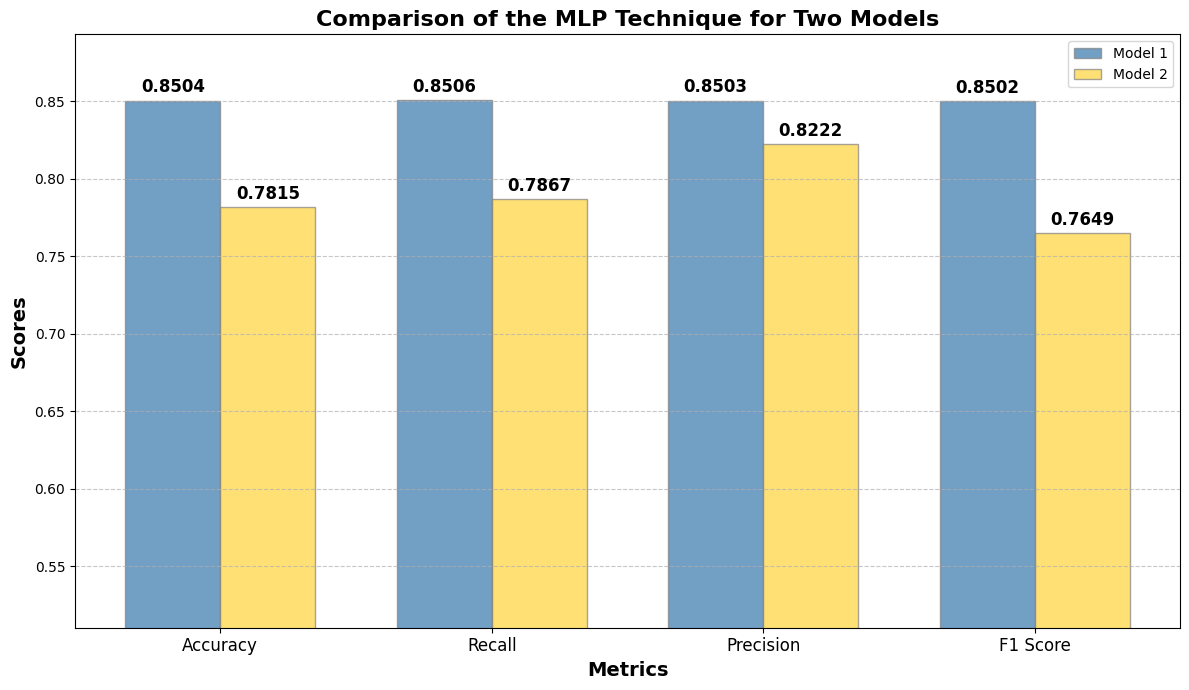

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Valores das métricas para cada série de dados
values1 = [np.mean(accuracy_mlp_test1), np.mean(recall_mlp_test1), np.mean(precision_mlp_test1), np.mean(f1_mlp_test1)]
values2 = [np.mean(accuracy_mlp_test2), np.mean(recall_mlp_test2), np.mean(precision_mlp_test2), np.mean(f1_mlp_test2)]

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Nomes das métricas para o eixo x
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], metrics, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of the MLP Technique for Two Models', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [68]:
# Atualizando list_max_and_min com os resultados combinados de KNN e RF
list_max_and_min[0] = results_knn1['list_max_and_min']
list_max_and_min[1] = results_knn2['list_max_and_min']
list_max_and_min[2] = results_rf1['maximo']
list_max_and_min[3] = results_rf1['minimo']
list_max_and_min[4] = results_rf2['maximo']
list_max_and_min[5] = results_rf2['minimo']
list_max_and_min[6] = results_mlp1['maximo']
list_max_and_min[7] = results_mlp1['minimo']
list_max_and_min[8] = results_mlp2['maximo']
list_max_and_min[9] = results_mlp2['minimo']



# Comparando os resultados


Verificando o melhor modelo com base na media de todas as precisões

In [69]:
#Verificando o melhor modelo com base nas médias

maximo = list_max_and_min.index(max(list_max_and_min))

if(maximo==0):
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 1 usando KNN')
  print('Acurácia:', accuracy_knn_test1[0])
  print('Recall:', recall_knn_test1[0])
  print('Precision:', precision_knn_test1[0])
  print('f1 Score:', f1_knn_test1[0])
elif(maximo==1):
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 2 usando KNN')
  print('Acurácia:', accuracy_knn_test2[0])
  print('Recall:', recall_knn_test2[0])
  print('Precision:', precision_knn_test2[0])
  print('f1 Score:', f1_knn_test2[0])
elif(maximo==2):
  indice = list_sum_total_rf1.index(max(list_max_and_min))
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 1 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test1[maximo])
  print('Recall:', recall_rf_test1[maximo])
  print('Precision:', precision_rf_test1[maximo])
  print('f1 Score:', f1_rf_test1[maximo])
elif(maximo==4):
  indice = list_sum_total_rf2.index(max(list_max_and_min))
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 2 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test2[indice])
  print('Recall:', recall_rf_test2[indice])
  print('Precision:', precision_rf_test2[indice])
  print('f1 Score:', f1_rf_test2[indice])
elif(maximo==6):
  indice = list_sum_total_mlp1.index(max(list_max_and_min))
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 1 usando MLP')
  print('Acurácia:', accuracy_mlp_test1[indice])
  print('Recall:', recall_mlp_test1[indice])
  print('Precision:', precision_mlp_test1[indice])
  print('f1 Score:', f1_mlp_test1[indice])
elif(maximo==8):
  indice = list_sum_total_mlp2.index(max(list_max_and_min))
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 2 usando MLP')
  print('Acurácia:', accuracy_mlp_test2[maximo])
  print('Recall:', recall_mlp_test2[maximo])
  print('Precision:', precision_mlp_test2[maximo])
  print('f1 Score:', f1_mlp_test2[maximo])



O melhor modelo foi o MODELO 1 para a base de dados 2 usando KNN
Acurácia: 0.8629629629629629
Recall: 0.8621969322117764
Precision: 0.8630952380952381
f1 Score: 0.8625386996904025


Calculando agora o pior modelo

In [70]:
#Verificando o pior modelo com base nas médias

minimo = list_max_and_min.index(min(list_max_and_min))
if(minimo==0):
  print('O pior modelo foi o MODELO 0 para a base de dados 1 usando KNN')
  print('Acurácia:', accuracy_knn_test1[0])
  print('Recall:', recall_knn_test1[0])
  print('Precision:', precision_knn_test1[0])
  print('f1 Score:', f1_knn_test1[0])
elif(minimo==1):
  print('O pior modelo foi o MODELO 1 para a base de dados 2 usando KNN')
  print('Acurácia:', accuracy_knn_test2[0])
  print('Recall:', recall_knn_test2[0])
  print('Precision:', precision_knn_test2[0])
  print('f1 Score:', f1_knn_test2[0])
elif(minimo==3):
  indice = list_sum_total_rf1.index(min(list_max_and_min))
  print('O pior modelo foi o MODELO', minimo, 'para a base de dados 1 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test1[indice])
  print('Recall:', recall_rf_test1[indice])
  print('Precision:', precision_rf_test1[indice])
  print('f1 Score:', f1_rf_test1[indice])
elif(minimo==5):
  indice = list_sum_total_rf2.index(min(list_max_and_min))
  print('O pior modelo foi o MODELO', minimo, 'para a base de dados 2 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test2[indice])
  print('Recall:', recall_rf_test2[indice])
  print('Precision:', precision_rf_test2[indice])
  print('f1 Score:', f1_rf_test2[indice])
elif(minimo==7):
  indice = list_sum_total_mlp1.index(min(list_max_and_min))
  print('O pior modelo foi o MODELO', minimo, 'para a base de dados 1 usando MLP')
  print('Acurácia:', accuracy_mlp_test1[indice])
  print('Recall:', recall_mlp_test1[indice])
  print('Precision:', precision_mlp_test1[indice])
  print('f1 Score:', f1_mlp_test1[indice])
elif(minimo==9):
  indice = list_sum_total_mlp2.index(min(list_max_and_min))
  print('O pior modelo foi o MODELO', indice, 'para a base de dados 2 usando MLP')
  print('Acurácia:', accuracy_mlp_test2[indice])
  print('Recall:', recall_mlp_test2[indice])
  print('Precision:', precision_mlp_test2[indice])
  print('f1 Score:', f1_mlp_test2[indice])


O pior modelo foi o MODELO 1 para a base de dados 2 usando MLP
Acurácia: 0.6474074074074074
Recall: 0.660893946890978
Precision: 0.768369243822067
f1 Score: 0.5977683226294399


Montando o gráfico para os modelos

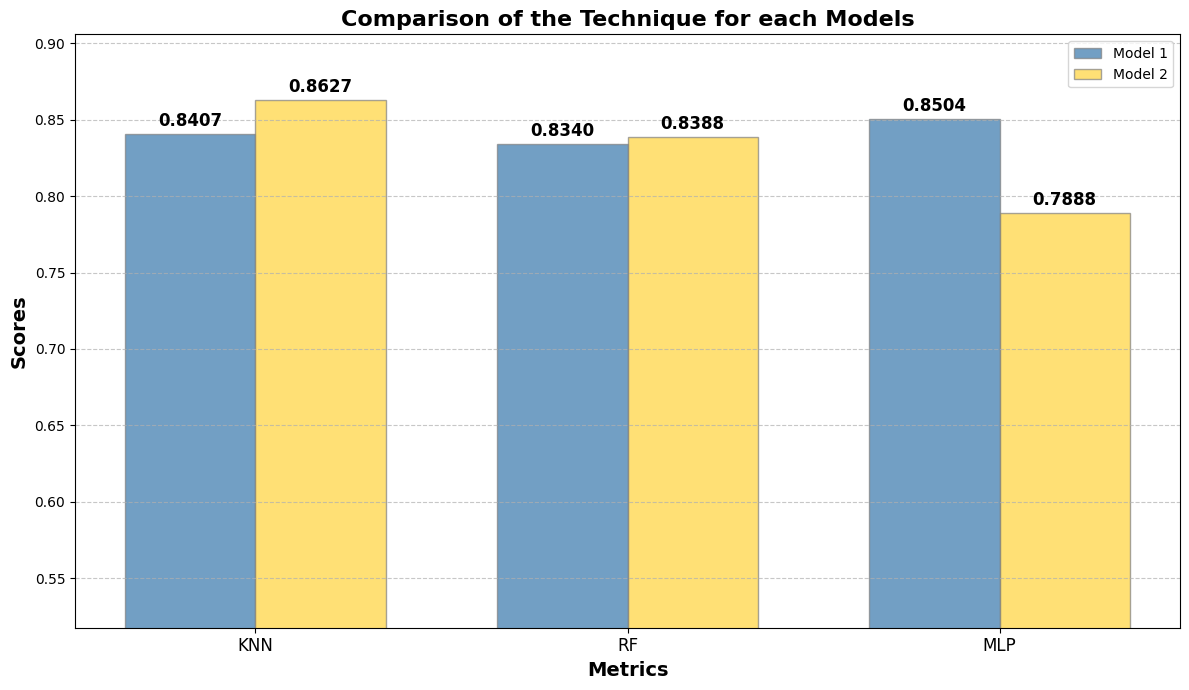

In [71]:
# Calculando as médias das métricas
x = np.mean(accuracy_knn_test1 + recall_knn_test1 + precision_knn_test1 + f1_knn_test1)
y = np.mean(accuracy_rf_test1 + recall_rf_test1 + precision_rf_test1 + f1_rf_test1)
z = np.mean(accuracy_mlp_test1 + recall_mlp_test1 + precision_mlp_test1 + f1_mlp_test1)

u = np.mean(accuracy_knn_test2 + recall_knn_test2 + precision_knn_test2 + f1_knn_test2)
v = np.mean(accuracy_rf_test2 + recall_rf_test2 + precision_rf_test2 + f1_rf_test2)
w = np.mean(accuracy_mlp_test2 + recall_mlp_test2 + precision_mlp_test2 + f1_mlp_test2)

# Valores das métricas para cada série de dados
values1 = [x, y, z]
values2 = [u, v, w]

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Nomes das métricas para o eixo x
metrics = ['KNN', 'RF', 'MLP']

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], metrics, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of the Technique for each Models', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


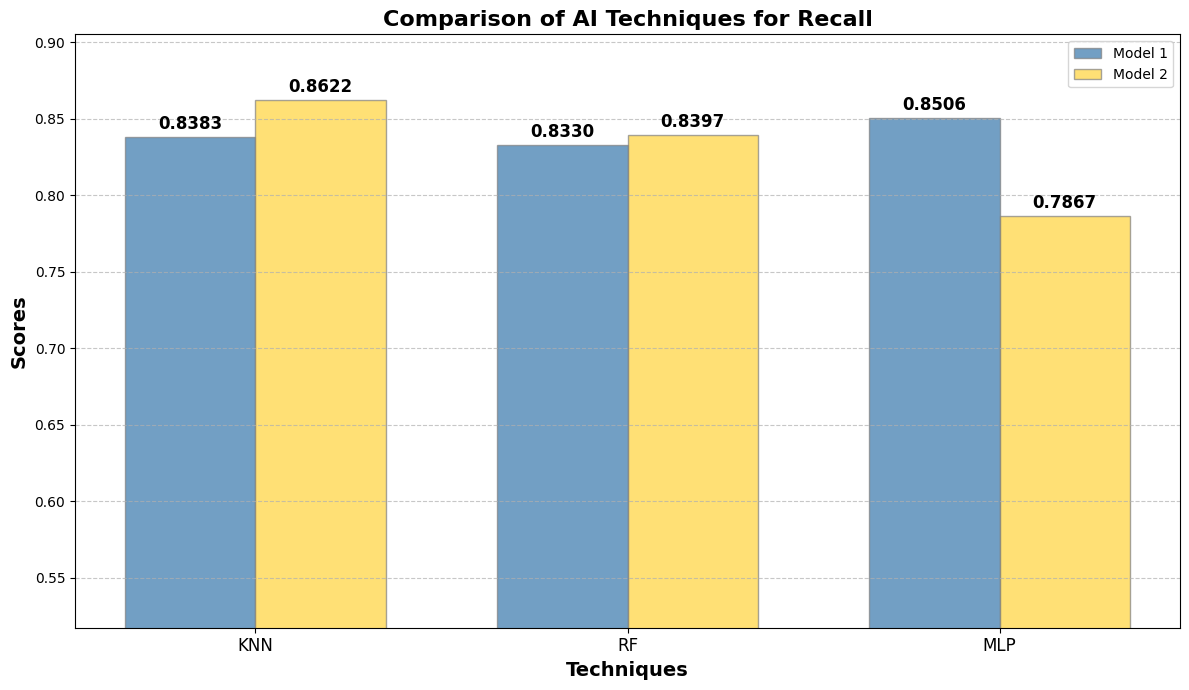

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Suposições de que as variáveis accuracy_knn_test1, recall_knn_test1, etc. já foram definidas
# e contêm listas de valores de desempenho.

# Função para calcular a média de todas as métricas fornecidas
def calculate_mean(*metrics):
    return np.mean(np.concatenate(metrics))

# Calculando as médias das métricas para cada técnica e cada modelo
x = calculate_mean(recall_knn_test1)
y = calculate_mean(recall_rf_test1)
z = calculate_mean(recall_mlp_test1)

u = calculate_mean(recall_knn_test2)
v = calculate_mean(recall_rf_test2)
w = calculate_mean(recall_mlp_test2)

# Valores das métricas para cada série de dados
values1 = [x, y, z]
values2 = [u, v, w]

# Nomes das técnicas
techniques = ['KNN', 'RF', 'MLP']

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Techniques', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], techniques, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of AI Techniques for Recall', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


Comparando o `máximo` e o `mínimo` para cada técnica

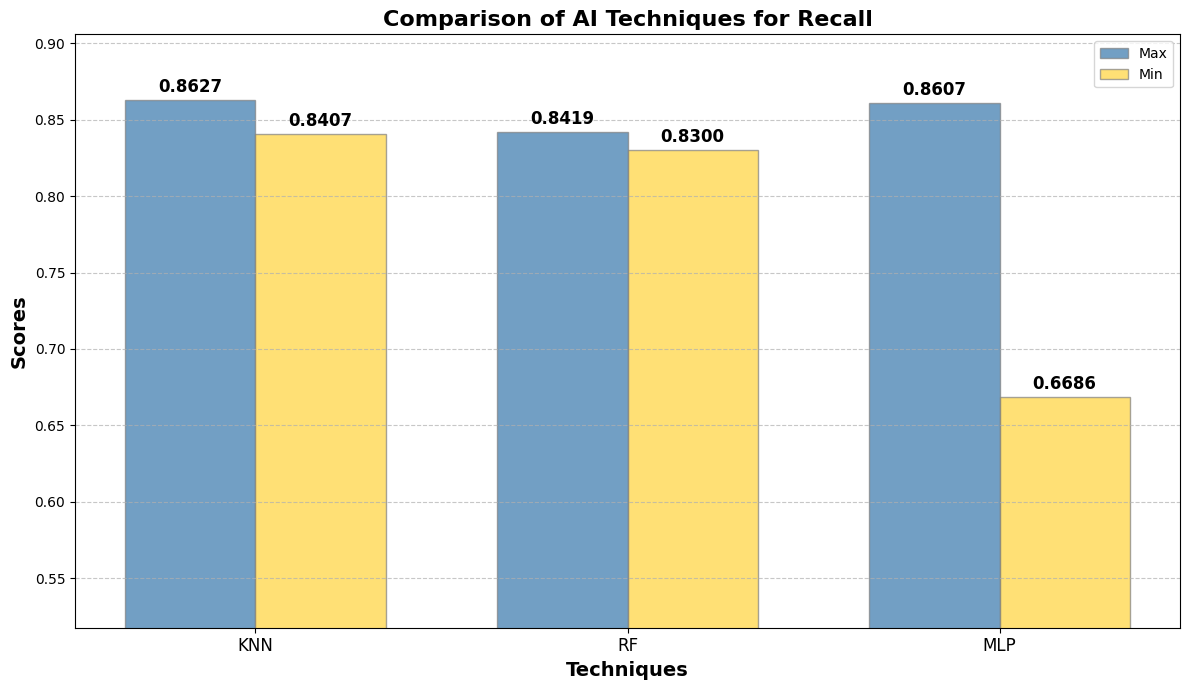

In [73]:
# Nomes das métricas
metrics = ['KNN', 'RF', 'MLP']

if(list_max_and_min[0] > list_max_and_min[1]):
  x = list_max_and_min[0]
  u = list_max_and_min[1]
else:
  x = list_max_and_min[1]
  u = list_max_and_min[0]

if(list_max_and_min[2] > list_max_and_min[4]):
  y = list_max_and_min[2]
else:
  y = list_max_and_min[4]

if(list_max_and_min[6] > list_max_and_min[8]):
  z = list_max_and_min[6]
else:
  z = list_max_and_min[8]

if(list_max_and_min[3] < list_max_and_min[5]):
  v = list_max_and_min[3]
else:
  v = list_max_and_min[5]

if(list_max_and_min[7] < list_max_and_min[9]):
  w = list_max_and_min[7]
else:
  w = list_max_and_min[9]

# Valores das métricas para cada série de dados
values1 = [x, y, z]
values2 = [u, v, w]

# Nomes das técnicas
techniques = ['KNN', 'RF', 'MLP']

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Max')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Min')

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Techniques', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], techniques, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of AI Techniques for Recall', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


#**Conclusão**

Neste estudo, avaliamos a performance de três técnicas de aprendizado de máquina - `Multi-Layer Perceptron (MLP)`, `K-Nearest Neighbors (KNN)` e `Random Forest (RF)` - na tarefa de classificação de tipos de uvas-passas.

<br>

Os resultados demonstraram que o MLP apresentou o pior desempenho entre os três modelos, com menores índices de `acurácia`, `recall`, `precisão` e `F1-Score`. Isso pode ser atribuído a uma possível inadequação da arquitetura do MLP para este conjunto de dados específico ou à necessidade de um ajuste mais fino dos hiperparâmetros.

<br>

Por outro lado, tanto o KNN quanto o RF apresentaram resultados semelhantes, com KNN se destacando levemente superior. O KNN teve uma vantagem em termos de precisão e recall, o que sugere que ele foi mais eficaz na classificação correta dos tipos de uvas-passas.

<br>

Cenários ideais para o uso de cada modelo:

KNN: Devido à sua simplicidade e eficiência, o KNN é ideal para conjuntos de dados onde as classes são bem separadas e o volume de dados não é extremamente grande. Ele é particularmente útil quando a interpretabilidade do modelo é importante, pois a decisão é baseada diretamente nos exemplos mais próximos.

<br>

RF: Este modelo é mais adequado para conjuntos de dados mais complexos e grandes, onde a robustez contra overfitting e a capacidade de lidar com alta dimensionalidade são cruciais. O RF pode ser ideal para aplicações onde o tempo de treinamento não é uma restrição severa e a precisão é altamente valorizada.

<br>

MLP: Apesar de seu desempenho inferior neste estudo, o MLP pode ser vantajoso em cenários onde há dados de grande volume e complexidade, e onde há possibilidade de ajustar a rede neural para capturar padrões não lineares complexos. É recomendado especialmente quando outras técnicas mais simples não conseguem atingir um bom desempenho.
Em resumo, embora o KNN tenha demonstrado um desempenho ligeiramente superior neste estudo específico, a escolha do modelo ideal deve sempre considerar o contexto do problema, as características dos dados e os requisitos específicos de implementação.